In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/train_v9rqX0R (1).csv')
test=pd.read_csv('/content/drive/MyDrive/test_AbJTz2l.csv')

In [ ]:
test.shape,train.shape

((5681, 11), (8523, 12))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


* there are lot of zeros in the item visibility we have to treat it

In [ ]:
#lets check the info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### EDA: univariate analysis 

In [ ]:
# combining the data
combined=pd.concat([train,test],ignore_index=True)

In [ ]:
combined.shape

(14204, 12)

In [ ]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### base model

In [ ]:
solutionbigmart=DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':train.Item_Outlet_Sales.mean()})

In [ ]:
solutionbigmart.to_csv('basemodel.csv',index=False)

In [ ]:
num_col=combined.select_dtypes(exclude='object').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
cat_col=combined.select_dtypes('object').columns
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

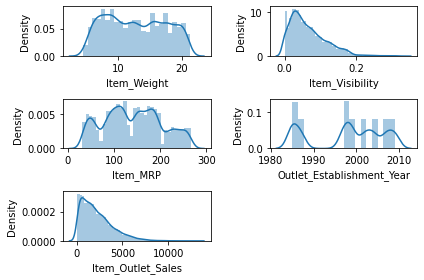

In [ ]:
c=1
for i in num_col:
  plt.subplot(3,2,c)
  sns.distplot(combined[i])
  c=c+1
plt.tight_layout()
plt.show()


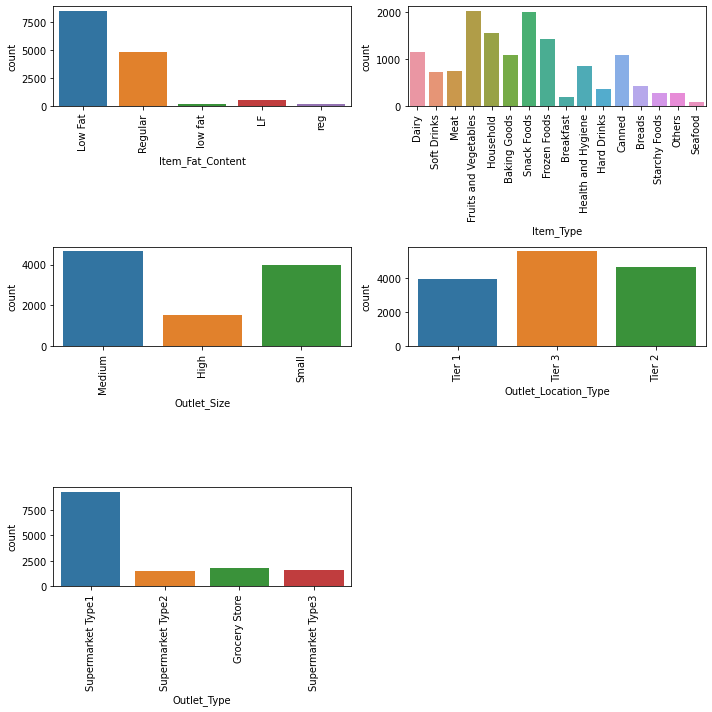

In [ ]:
c=1
plt.figure(figsize=[10,10])
for i in [ 'Item_Fat_Content', 'Item_Type',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] :
  plt.subplot(3,2,c)
  sns.countplot(combined[i])
  plt.xticks(rotation=90)
  c=c+1
plt.tight_layout()
plt.show()

In [ ]:
combined.Item_Fat_Content.replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

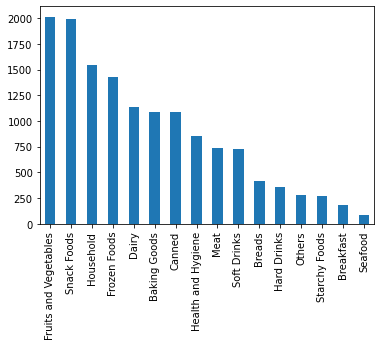

In [ ]:
combined.Item_Type.value_counts().plot(kind='bar')

In [ ]:
combined.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

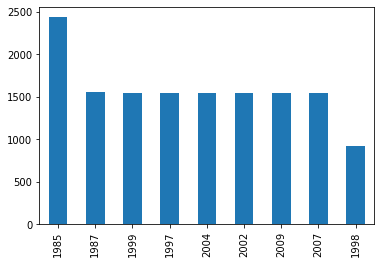

In [ ]:
combined.Outlet_Establishment_Year.value_counts().plot(kind='bar')

* we will do frequency encoding


In [ ]:
combined.Outlet_Establishment_Year.value_counts()/14204

1985    0.171712
1987    0.109335
1999    0.109124
1997    0.109124
2004    0.109124
2002    0.108983
2009    0.108843
2007    0.108631
1998    0.065123
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
## sescriptive analysis for numerical
combined.loc[:,num_col].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**bivariate analysis**

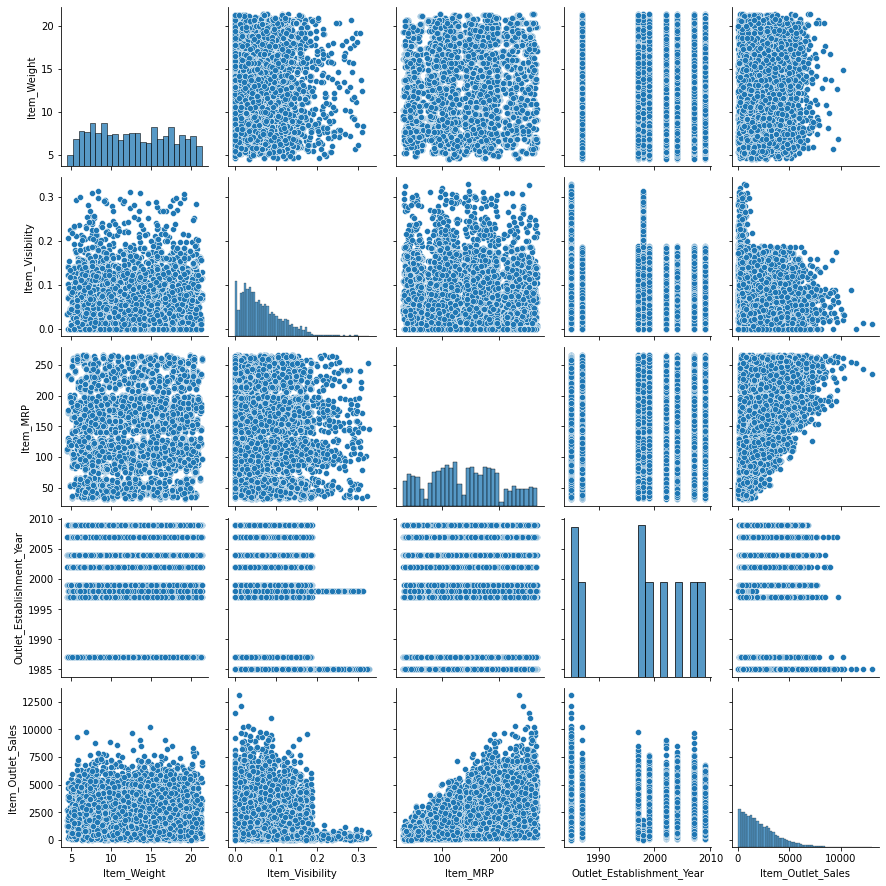

In [ ]:
sns.pairplot(combined)

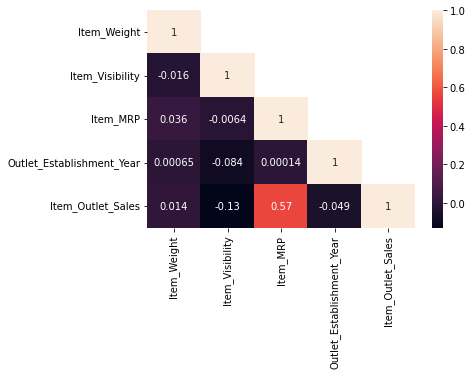

In [ ]:
sns.heatmap(combined.corr(),annot=True,mask=np.triu(combined.corr(),k=1))

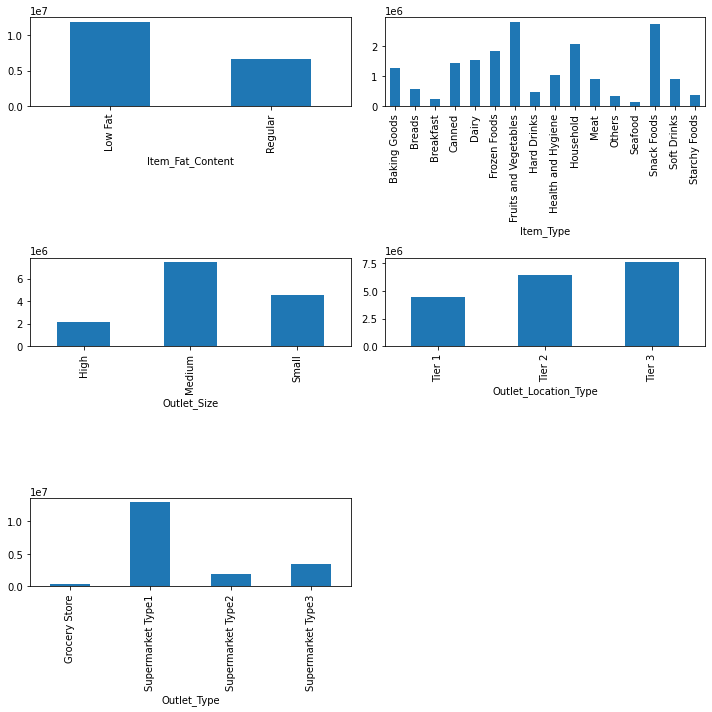

In [ ]:
## cat vs num
c=1
plt.figure(figsize=[10,10])
for i in [ 'Item_Fat_Content', 'Item_Type',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] :
  plt.subplot(3,2,c)
  combined.groupby(i).sum()['Item_Outlet_Sales'].plot(kind='bar')
  plt.xticks(rotation=90)
  c=c+1
plt.tight_layout()
plt.show()

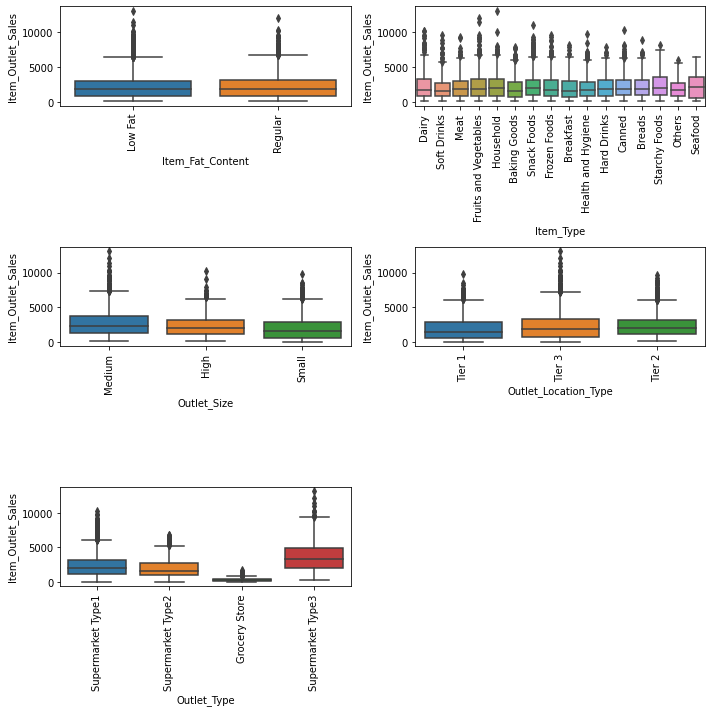

In [ ]:
c=1
plt.figure(figsize=[10,10])
for i in [ 'Item_Fat_Content', 'Item_Type',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] :
  plt.subplot(3,2,c)
  sns.boxplot(combined[i],combined['Item_Outlet_Sales'])
  plt.xticks(rotation=90)
  c=c+1
plt.tight_layout()
plt.show()

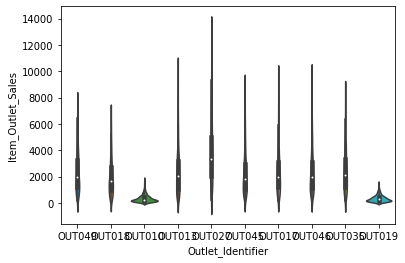

In [ ]:
sns.violinplot(combined['Outlet_Identifier'],combined['Item_Outlet_Sales'])

In [ ]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [ ]:
combined.loc[combined.Item_Weight.isnull(),].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [ ]:
pd.options.display.max_rows=None

In [ ]:
combined[combined['Item_Weight'].isnull()][['Item_Weight','Outlet_Type']].head()

,Item_Weight,Outlet_Type
7,NaN,Supermarket Type3
18,NaN,Supermarket Type3
21,NaN,Supermarket Type3
23,NaN,Grocery Store
29,NaN,Grocery Store


In [ ]:
combined[combined['Item_Weight'].isnull()]['Outlet_Type'].unique()

array(['Supermarket Type3', 'Grocery Store'], dtype=object)

In [ ]:
combined['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
combined[combined['Item_Weight'].isnull()].index

Int64Index([    7,    18,    21,    23,    29,    36,    38,    39,    49,
               59,
            ...
            14150, 14157, 14163, 14166, 14171, 14178, 14179, 14184, 14188,
            14192],
           dtype='int64', length=2439)

In [ ]:
 
 for i in combined[combined['Item_Weight'].isnull()].index:
    j =combined.loc[i,'Item_Identifier']
    for k in combined[combined['Item_Identifier']==j]['Item_Weight'].mode():
      combined.loc[i,'Item_Weight']=k
   


In [ ]:
combined.loc[7,'Item_Identifier']

'FDP10'

In [ ]:
combined.loc[7,'Item_Weight']

19.0

In [ ]:
combined[combined['Item_Identifier']=='FDP10']['Item_Weight'].mode()

0    19.0
dtype: float64

In [ ]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [ ]:
# item visibility==00
combined['Item_Visibility']=combined.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x:x.replace(to_replace=0,value=x.median()))


In [ ]:
combined.loc[combined.Item_Visibility==0,]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
651,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,46.5402,OUT010,1998,NaN,Tier 3,Grocery Store,229.7010
4208,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.9402,OUT027,1985,Medium,Tier 3,Supermarket Type3,872.8638
4791,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.2402,OUT018,2009,Medium,Tier 3,Supermarket Type2,1148.5050
12966,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,44.1402,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
13259,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [ ]:
combined.loc[combined.Item_Type=='Fruits and Vegetables','Item_Visibility'].median()

0.058279823

In [ ]:
combined.Item_Visibility.replace(to_replace=0,value=0.058279823,inplace=True)

In [ ]:
combined[combined['Outlet_Size'].isnull()]['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [ ]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [ ]:
combined.loc[combined.Outlet_Identifier=='OUT010','Outlet_Size']='Small'

In [ ]:
combined.Outlet_Size.unique()

array(['Medium', 'Small', 'High', nan], dtype=object)

In [ ]:
combined[combined['Outlet_Size'].isnull()]['Outlet_Type'].unique()

array(['Supermarket Type1'], dtype=object)

In [ ]:
combined.groupby('Outlet_Size')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
High,932.0,2298.995256,1533.531664,73.2380,1072.6038,2050.6640,3166.37835,10256.6490
Medium,2793.0,2681.603542,1855.210528,69.2432,1270.3464,2251.0698,3691.19520,13086.9648
Small,2943.0,1615.546167,1556.928329,33.2900,362.5281,1090.5804,2463.46000,9779.9362


In [ ]:
combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [ ]:
combined.loc[combined.Outlet_Identifier=='OUT045','Outlet_Size']='High'
combined.loc[combined.Outlet_Identifier=='OUT017','Outlet_Size']='Small'

In [ ]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

**Featuring Engineering**

In [ ]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
def ibs(x):
  return x[0:2]

In [ ]:
combined['Item_Ids']=combined['Item_Identifier'].apply(ibs)

In [ ]:
combined.loc[combined.Item_Ids=='NC','Item_Fat_Content']='Non Edible'

In [ ]:
## Item Type
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
# bin the data in perishable and non-perishable
perishable=['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast', 'Breads','Seafood']
def peris(x):
  perishable=['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast', 'Breads','Seafood']
  if x in perishable:
    return 'perishable'
  else:
    return 'non perishable'

In [ ]:
combined['Itemtype_cat']=combined.Item_Type.apply(peris)

In [ ]:
## outlier Id
frq=combined.Outlet_Identifier.value_counts()/14204
combined['Outl_frq']=combined.Outlet_Identifier.map(frq)

In [ ]:
## vintage
combined['vintage']=2013-combined.Outlet_Establishment_Year

In [ ]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Itemtype_cat,Outl_frq,vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,perishable,0.109124,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,non perishable,0.108843,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,perishable,0.109124,14
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,perishable,0.065123,15
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,non perishable,0.109335,26


In [ ]:
combined['Sales']=combined.Item_Weight*combined.Item_MRP

In [ ]:
final=combined.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [ ]:
final.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Itemtype_cat,Outl_frq,vintage,Sales
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,perishable,0.109124,14,2323.225560
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,non perishable,0.108843,4,285.753664
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,perishable,0.109124,14,2478.315000
3,19.20,Regular,0.022914,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,perishable,0.065123,15,3496.224000
4,8.93,Non Edible,0.013177,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,non perishable,0.109335,26,480.982302


In [ ]:
# statistical test
stats.ttest_ind(combined.Sales.dropna(),combined.Item_Outlet_Sales.dropna())

Ttest_indResult(statistic=-19.797892238834628, pvalue=1.6646243706058666e-86)

In [ ]:
stats.ttest_ind(combined.vintage.dropna(),combined.Item_Outlet_Sales.dropna())

Ttest_indResult(statistic=-151.27920299384095, pvalue=0.0)

In [ ]:
stats.ttest_ind(combined.Outl_frq.dropna(),combined.Item_Outlet_Sales.dropna())

Ttest_indResult(statistic=-152.33444860527277, pvalue=0.0)

In [ ]:
# encoding the data
final["Outlet_Size"] = final.Outlet_Size.map({"Small":1, "Medium":2, "High":3})
dummydata=pd.get_dummies(final,drop_first=True)



In [ ]:
dummydata.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outl_frq,vintage,Sales,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,Itemtype_cat_perishable
0,9.30,0.016047,249.8092,2,3735.1380,0.109124,14,2323.225560,0,0,0,0,1,0,0,1,0,1
1,5.92,0.019278,48.2692,2,443.4228,0.108843,4,285.753664,0,1,0,1,0,1,0,0,0,0
2,17.50,0.016760,141.6180,2,2097.2700,0.109124,14,2478.315000,0,0,0,0,1,0,0,1,0,1
3,19.20,0.022914,182.0950,1,732.3800,0.065123,15,3496.224000,0,1,0,1,0,0,0,1,0,1
4,8.93,0.013177,53.8614,3,994.7052,0.109335,26,480.982302,1,0,0,1,1,0,0,0,1,0


In [ ]:
## train_test_split
newtrain=dummydata.loc[0:train.shape[0]-1,]
newtest=dummydata.loc[train.shape[0]:,]

In [ ]:
newtrain.shape,newtest.shape

((8523, 18), (5681, 18))

In [ ]:
xtrain=newtrain.drop('Item_Outlet_Sales',axis=1)
ytrain=newtrain['Item_Outlet_Sales']

In [ ]:
xtest=newtest.drop('Item_Outlet_Sales',axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
model1=lr.fit(xtrain,ytrain)


In [ ]:
model1.predict(xtest)

array([1766.14451972, 1608.93903945, 1890.56258894, ..., 1850.36395934,
       3563.78809045, 1306.40961647])

In [ ]:
solution=DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':abs(model1.predict(xtest))})

In [ ]:
solution.to_csv('LRmodel1.csv',index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
mod2=gbr.fit(xtrain,ytrain)


In [ ]:
solution=DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':abs(mod2.predict(xtest))})

In [ ]:
solution.to_csv('gbrmodel1.csv',index=False)

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle = True)

gbm = GradientBoostingRegressor()
pred_gbm = pd.DataFrame()

n = 100
for i in range(n):
    folds = next(kfold.split(xtrain)) # Split the Data in even groups
    xtrain1 = xtrain.iloc[folds[0]]
    ytrain1 = ytrain.iloc[folds[0]]
    #print(xtrain.shape, ytrain.shape)
    pred_gbm[i] = gbm.fit(xtrain1, ytrain1).predict(xtest)


In [ ]:
gbm_cv=pred_gbm.mean(axis=1)

In [ ]:
solution=DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':abs(gbm_cv)})

In [ ]:
solution.to_csv('gbrkfoldmodel.csv',index=False)

In [ ]:
#  Tune the Parameters of the GBM

from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

params = [{"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
         "learning_rate":[0.1, 0.2, 0.01, 0.25, 0.3, 0.5],
          "criterion":['friedman_mse', 'squared_error', 'mse'],
          'max_depth':[4, 5,6,7,8]}]


In [ ]:
search = GridSearchCV(estimator=gbm, param_grid=params, cv = 10)

search.fit(xtrain, ytrain)

print(search.best_params_)


KeyboardInterrupt: ignored

In [ ]:
gbm.best

In [ ]:
search = 
# Tuned Model

kfold = KFold(n_splits=10, shuffle = True)

tunedgbm = GradientBoostingRegressor(loss = , learning_rate = , criterion = , max_depth = )

#lgbm = LGBMRegressor()
pred_gbm = pd.DataFrame()

n = 50
for i in range(n):
    folds = next(kfold.split(xtrain)) # Split the Data in even groups
    xtrain1 = xtrain.iloc[folds[0]]
    ytrain1 = ytrain.iloc[folds[0]]
    #print(xtrain.shape, ytrain.shape)
    pred_gbm[i] = tunedgbm.fit(xtrain1, ytrain1).predict(xtest)


SyntaxError: ignored